In [1]:
# local import for testing
import sys, os
sys.path.insert(1, '../src/SupplyNetPy/Components/')
import core as scm
import utilities as scm
import simpy


def print_performance_metrics(supplychainnet):
    print("Performance Metrics:")
    print("Total Available Inventory:", supplychainnet["total_available_inv"])
    print("Average Available Inventory:", supplychainnet["avg_available_inv"])
    print("Total Inventory Carry Cost:", supplychainnet["total_inv_carry_cost"])
    print("Total Inventory Spend:", supplychainnet["total_inv_spend"])
    print("Total Transport Cost:", supplychainnet["total_transport_cost"])
    print("Total Revenue:", supplychainnet["total_revenue"])
    print("Total Cost:", supplychainnet["total_cost"])
    print("Total Profit:", supplychainnet["total_profit"])
    print("Total Demand Placed by Customers:", supplychainnet["total_demand_by_customers"])
    print("Total Fulfillment Received by Customers:", supplychainnet["total_fulfillment_received_by_customers"])
    print("Total Demand Placed by Site:", supplychainnet["total_demand_by_site"])
    print("Total Fulfillment Received by Site:", supplychainnet["total_fulfillment_received_by_site"])
    print("Total Demand Placed:", supplychainnet["total_demand"])
    print("Total Fulfillment Received:", supplychainnet["total_fulfillment_received"])
    print("Average Cost per Order:", supplychainnet["avg_cost_per_order"])
    print("Average Cost per Item:", supplychainnet["avg_cost_per_item"])

INFO D1 - 0.0000:D1: Inventory levels:1000, on hand:1000
INFO D2 - 0.0000:D2: Inventory levels: 1500, on hand: 1500
INFO demand_D1 - 0.0000:demand_D1:Customer1:Order quantity:400, available.
INFO D1 - 0.0000:D1: Inventory levels:200, on hand:200
INFO D1 - 0.0000:D1:Replenishing inventory from supplier:Supplier, order placed for 800 units.
INFO demand_D2 - 0.0000:demand_D2:Customer1:Order quantity:400, available.
INFO demand_D3 - 0.0000:demand_D3:Customer1:Order quantity:60, available.
INFO D2 - 0.0000:D2: Inventory levels: 1360, on hand: 1360
INFO demand_D4 - 0.0000:demand_D4:Customer1:Order quantity:80, available.
INFO D1 - 0.0000:D1:shipment in transit from supplier:Supplier.
INFO demand_D1 - 1.0000:demand_D1:Customer2: Order quantity:400 not available, inventory level:200. No tolerance! Shortage:200.
INFO demand_D2 - 1.0000:demand_D2:Customer2: Order quantity:400 not available, inventory level:200. No tolerance! Shortage:200.
INFO demand_D1 - 2.0000:demand_D1:Customer3: Order quanti

{'_info_keys': ['ID', 'name', 'node_type', 'failure_p', 'node_status', 'logging', 'sell_price', 'buy_price', 'ongoing_order', 'selection_policy'], 'env': <simpy.core.Environment object at 0x10e1eda90>, 'ID': 'D1', 'name': 'Distribution Center 1', 'node_type': 'distributor', 'node_failure_p': 0.0, 'node_status': 'active', 'node_disrupt_time': None, 'node_recovery_time': <function Node.<lambda> at 0x10d6b3740>, 'logger': <SupplyNetPy.Components.logger.GlobalLogger object at 0x10e34af90>, 'replenishment_policy': min-max replenishment (s, S), 'inventory': Inventory, 'inventory_drop': <Event() object at 0x10a009e10>, 'inventory_raised': <Event() object at 0x10e349860>, 'manufacture_date': None, 'sell_price': 300, 'buy_price': 150, 'suppliers': [S1 to D1], 'ongoing_order': True, 'selection_policy': <core.SelectFirst object at 0x10e34a7b0>, 'stats': <core.Statistics object at 0x10e3e6850>}


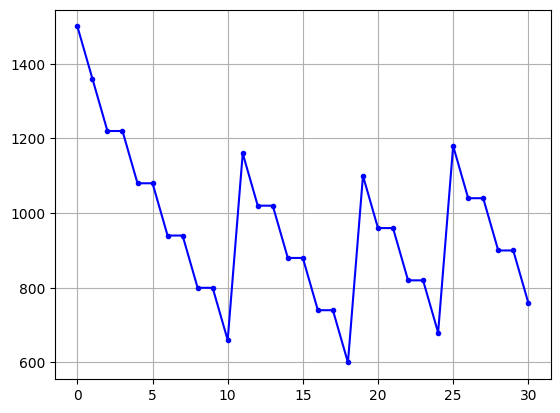

In [23]:
simtime = 31
env = simpy.Environment()
raw_mat = scm.RawMaterial(ID="RM1", name="raw materials mouse", extraction_quantity=650, 
                          extraction_time=1, mining_cost=0.01, cost=0.1) 

supplier = scm.Supplier(env=env, ID='S1', name='Supplier', node_type="infinite_supplier")
supplier2 = scm.Supplier(env=env, ID='S2', name='Supplier', node_type="infinite_supplier")


mouse = scm.Product(ID="B1", name="WM 1", manufacturing_cost=10, manufacturing_time=0, sell_price=300, buy_price=150,
                             raw_materials=[{"raw_material": raw_mat, "quantity": 1}], batch_size=2500)

distributor1 = scm.InventoryNode(env=env, ID='D1', name='Distribution Center 1', node_type="distributor",
                                capacity=1000, initial_level=1000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':400, 'S':1000},
                                product_buy_price=150, product_sell_price=300)
distributor2 = scm.InventoryNode(env=env, ID='D2', name='Distribution Center 2', node_type="distributor",
                                capacity=1500, initial_level=1500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':1000, 'Q':500},
                                product_buy_price=150, product_sell_price=300)

link1 = scm.Link(env=env, ID='L1', source=supplier, sink=distributor1, cost=10, lead_time=lambda: 5)
link2 = scm.Link(env=env, ID='L2', source=supplier, sink=distributor2, cost=10, lead_time=lambda: 5)
# link3 = scm.Link(env=env, ID='L3', source=supplier2, sink=distributor1, cost=5, lead_time=lambda: 10)

demand1 = scm.Demand(env=env, ID='demand_D1', name='Demand 1', order_arrival_model=lambda: 1, order_quantity_model=lambda:400, 
                     delivery_cost=lambda:10, lead_time=lambda: 5, demand_node=distributor1)
demand2 = scm.Demand(env=env, ID='demand_D2', name='Demand 2', order_arrival_model=lambda: 1, order_quantity_model=lambda:400, 
                     delivery_cost=lambda:10, lead_time=lambda: 5, demand_node=distributor1)
demand3 = scm.Demand(env=env, ID='demand_D3', name='Demand 3', order_arrival_model=lambda: 2, order_quantity_model=lambda:60, 
                     delivery_cost=lambda:10, lead_time=lambda: 5, demand_node=distributor2)
demand4 = scm.Demand(env=env, ID='demand_D4', name='Demand 4', order_arrival_model=lambda: 2, order_quantity_model=lambda:80, 
                     delivery_cost=lambda:10, lead_time=lambda: 5, demand_node=distributor2)

inventory_nodes = [supplier, supplier2, distributor1, distributor2]
inventory_links = [link1, link2]
demand_nodes = [demand1, demand2, demand3, demand4]
scm.global_logger.enable_logging()
env.run(until=simtime)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(env=env, nodes = inventory_nodes, links = inventory_links, demands = demand_nodes)
supplynet = scm.simulate_sc_net(supplynet, sim_time=simtime)
for node in [supplier, distributor1, distributor2]:
    inv_levels = np.array(node.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
print(distributor1.get_statistics())


INFO D1 - 0.0000:D1: Inventory levels: 1500, on hand: 1500
INFO D2 - 0.0000:D2: Inventory levels:1000, on hand:1000
INFO demand_D1 - 0.0000:demand_D1:Customer1:Order quantity:50, available.
INFO D1 - 0.0000:D1: Inventory levels: 1450, on hand: 1450
INFO demand_D2 - 0.0000:demand_D2:Customer1:Order quantity:100, available.
INFO D2 - 0.0000:D2: Inventory levels:900, on hand:900
INFO demand_D1 - 1.0000:demand_D1:Customer1:Order quantity:50 received.
INFO demand_D2 - 1.0000:demand_D2:Customer1:Order quantity:100 received.
INFO demand_D1 - 1.0000:demand_D1:Customer2:Order quantity:50, available.
INFO D1 - 1.0000:D1: Inventory levels: 1400, on hand: 1400
INFO demand_D2 - 1.0000:demand_D2:Customer2:Order quantity:100, available.
INFO D2 - 1.0000:D2: Inventory levels:800, on hand:800
INFO demand_D1 - 2.0000:demand_D1:Customer2:Order quantity:50 received.
INFO demand_D2 - 2.0000:demand_D2:Customer2:Order quantity:100 received.
INFO demand_D1 - 2.0000:demand_D1:Customer3:Order quantity:50, avail

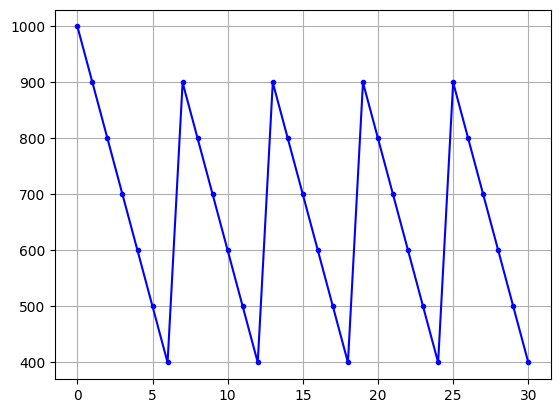

In [3]:
simtime = 31
env = simpy.Environment()
raw_mat = scm.RawMaterial(ID="RM1", name="raw materials mouse", extraction_quantity=650, 
                          extraction_time=1, mining_cost=0.01, cost=0.1) 

supplier = scm.Supplier(env=env, ID='S1', name='Supplier', node_type="infinite_supplier")

mouse = scm.Product(ID="B1", name="WM 1", manufacturing_cost=10, manufacturing_time=0, sell_price=300, buy_price=150,
                             raw_materials=[{"raw_material": raw_mat, "quantity": 1}], batch_size=2500)

distributor1 = scm.InventoryNode(env=env, ID='D1', name='Distribution Center 1', node_type="distributor",
                                capacity=1500, initial_level=1500, inventory_holding_cost=0.22,
                                replenishment_policy = scm.RQReplenishment, policy_param={'R':1000, 'Q':500},
                                product_buy_price=150, product_sell_price=300)

distributor2 = scm.InventoryNode(env=env, ID='D2', name='Distribution Center 2', node_type="distributor",
                                capacity=1500, initial_level=1000, inventory_holding_cost=0.22,
                                replenishment_policy = scm.SSReplenishment, policy_param={'s':400, 'S':1000},
                                product_buy_price=150, product_sell_price=300)

link1 = scm.Link(env=env, ID='L1', source=supplier, sink=distributor1, cost=10, lead_time=lambda: 1)
link2 = scm.Link(env=env, ID='L2', source=supplier, sink=distributor2, cost=10, lead_time=lambda: 1)

demand1 = scm.Demand(env=env, ID='demand_D1', name='Demand 1', order_arrival_model=lambda: 1, order_quantity_model=lambda:50, 
                     delivery_cost=lambda:10, lead_time=lambda: 1, demand_node=distributor1)
demand2 = scm.Demand(env=env, ID='demand_D2', name='Demand 2', order_arrival_model=lambda: 1, order_quantity_model=lambda:100, 
                     delivery_cost=lambda:10, lead_time=lambda: 1, demand_node=distributor2)


inventory_nodes = [supplier, distributor1, distributor2]
inventory_links = [link1, link2]
demand_nodes = [demand1, demand2, demand3, demand4]
scm.global_logger.enable_logging()
env.run(until=simtime)

import numpy as np
import matplotlib.pyplot as plt
supplynet = scm.create_sc_net(env=env, nodes = inventory_nodes, links = inventory_links, demands = demand_nodes)
supplynet = scm.simulate_sc_net(supplynet, sim_time=simtime)
for node in [supplier, distributor1, distributor2]:
    inv_levels = np.array(node.inventory.instantaneous_levels)
plt.plot(inv_levels[:,0], inv_levels[:,1], label='Inventory Level at D1', marker='.', color='blue')
plt.grid()
